In [85]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib

%matplotlib inline

In [2]:
users_vk_info_file_path_mask = "../Data/ProcesData/users_vk_info/users_from_%s_cluster_info.csv"

In [43]:
cluster_list = [0,136,45, 53, 137, 123, 105, 129]

In [72]:
data_frames = {}
for cluster_num in cluster_list:
    cluster_users_info_df = pd.read_csv(users_vk_info_file_path_mask %(cluster_num), encoding='windows-1251')
    data_frames[cluster_num] = cluster_users_info_df

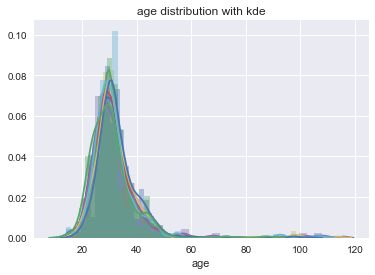

In [100]:
#age distributution with kde
for cluster_num in cluster_list:
    df = data_frames[cluster_num]
    sns.distplot(df[~df.age.isnull()].age)
    plt.title('age distribution with kde')

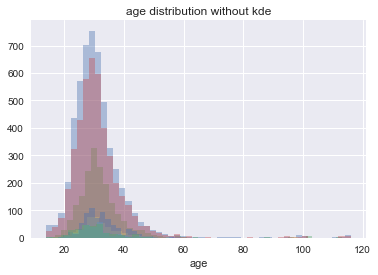

In [101]:
#age distribution without kde
for cluster_num in cluster_list:
    df = data_frames[cluster_num]
    sns.distplot(df[~df.age.isnull()].age, kde=False)
    plt.title('age distribution without kde')

Возростное распределение во всех исследуемых кластерах одинаковое. Пик приходится на 30 лет, подростки в распределении практически отсутсвуют.

TODO
1) Необходимо узнать в каком году и в каком возрасте люди оставляли чекины.
2) Необходимо узнать пользуются ли подростки VK
    2.1) Возможно подростки не раскрывают год своего рождения
    2.2) Подростки не оставляют чекины в заведениях выделенных кластеров
    2.3) Подростки отсутсвуют в ВК

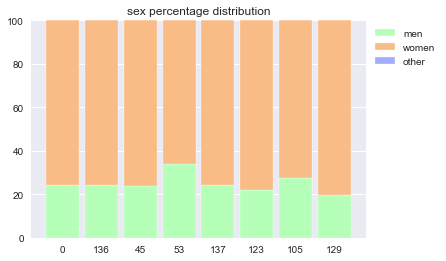

In [97]:
#sex distribution - percentage
sex_dist_list = []
for cluster_num in cluster_list:
    df = data_frames[cluster_num]
    
    sex_dist_dict = {}
    sex_value_counts = df.sex.value_counts()
    
    sex_dist_dict['cluster_num'] = cluster_num
    sex_dist_dict['women'] = sex_value_counts[1] if 1 in sex_value_counts.index else 0
    sex_dist_dict['men'] = sex_value_counts[2] if 2 in sex_value_counts else 0
    sex_dist_dict['other'] = sex_value_counts[3] if 3 in sex_value_counts else 0
    
    sex_dist_list.append(sex_dist_dict)
    
sex_dist_df = pd.DataFrame(sex_dist_list)

r = sex_dist_df.index

totals = [i+j+k for i,j,k in zip(sex_dist_df['men'], sex_dist_df['women'], sex_dist_df['other'])]
men = [i / j * 100 for i,j in zip(sex_dist_df['men'], totals)]
women = [i / j * 100 for i,j in zip(sex_dist_df['women'], totals)]
other = [i / j * 100 for i,j in zip(sex_dist_df['other'], totals)]

# plot
barWidth = 0.85
names = (sex_dist_df.cluster_num.tolist())

plt.bar(r, men, color='#b5ffb9', edgecolor='white', width=barWidth, label="men")

plt.bar(r, women, bottom=men, color='#f9bc86', edgecolor='white', width=barWidth , label='women')

plt.bar(r, other, bottom=[i+j for i,j in zip(men, women)], color='#a3acff', edgecolor='white', width=barWidth, label='other')

plt.xticks(r, names)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.title('sex percentage distribution')

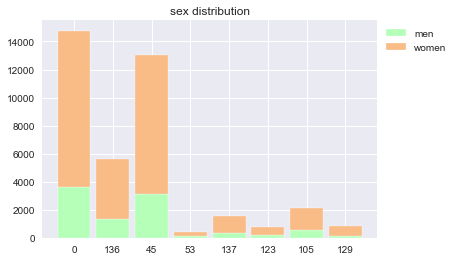

In [99]:
#sex distribution

men = sex_dist_df['men'].tolist()
women = sex_dist_df['women'].tolist()
other = sex_dist_df['other'].tolist()

plt.bar(r, men, color='#b5ffb9', edgecolor='white', width=barWidth, label='men')
plt.bar(r, women, bottom=men, color='#f9bc86', edgecolor='white', width=barWidth, label='women')

plt.xticks(r, names)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.title('sex distribution')

Чекины в ВК основном оставлют женщины в соотношении 4 к 1. Кластеры 0,136,45 имеют одинаковое соотношение м\ж, при этом это вложенные друг в друга кластера. Возможно это одни и те же люди. Против данной гипотезы выступают низкие метрики межкластерной схожести

TODO
Посмотреть насколько чаще женщины чекинятся

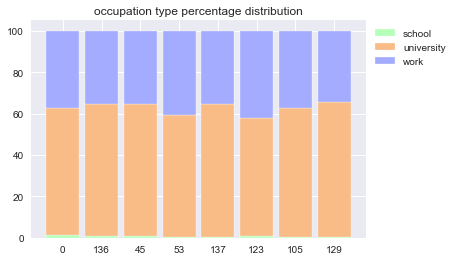

In [111]:
#occupation types distribution
occupation_dist_list = []

for cluster_num in cluster_list:
    df = data_frames[cluster_num]
   
    occupation_type_dict = {}
    occupation_type_dict['cluster_num'] = cluster_num
    
    occupation_type_values_count = df.occupation_type.value_counts()
    
    for occupation_type in occupation_type_values_count.index:
        occupation_type_dict[occupation_type] = occupation_type_values_count[occupation_type]
    
    occupation_dist_list.append(occupation_type_dict)

occupation_type_df = pd.DataFrame(occupation_dist_list)

r = occupation_type_df.index
names = occupation_type_df.cluster_num.tolist()

totals = [i+j+k for i,j,k in zip(occupation_type_df['school'], occupation_type_df ['university'], occupation_type_df ['work'])]
schools = [i / j * 100 for i,j in zip(occupation_type_df['school'], totals)]
university = [i / j * 100 for i,j in zip(occupation_type_df['university'], totals)]
work = [i / j * 100 for i,j in zip(occupation_type_df['work'], totals)]

# plot
barWidth = 0.85

plt.bar(r, schools, color='#b5ffb9', edgecolor='white', width=barWidth, label="school")

plt.bar(r, university, bottom=schools, color='#f9bc86', edgecolor='white', width=barWidth , label='university')

plt.bar(r, work, bottom=[i+j for i,j in zip(schools, university)], color='#a3acff', edgecolor='white', width=barWidth, label='work')

plt.xticks(r, names)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.title('occupation type percentage distribution')

Зависимость распределения места приложения труда чекиняшихся от места чекина не наблюдается. 

TODO
1) Это общая картина для всего vk или только для чекинящихся?
2) Прогнать по всем кластерам 
3) Получить распределение не связанное с чекинами

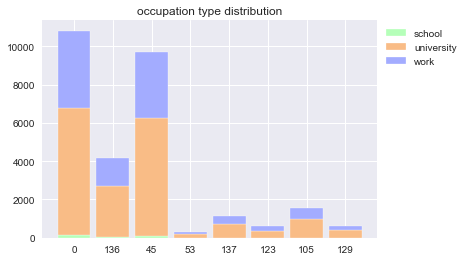

In [113]:
schools = occupation_type_df['school'].tolist()
university = occupation_type_df['university'].tolist()
work = occupation_type_df['work'].tolist()

# plot
barWidth = 0.85

plt.bar(r, schools, color='#b5ffb9', edgecolor='white', width=barWidth, label="school")

plt.bar(r, university, bottom=schools, color='#f9bc86', edgecolor='white', width=barWidth , label='university')

plt.bar(r, work, bottom=[i+j for i,j in zip(schools, university)], color='#a3acff', edgecolor='white', width=barWidth, label='work')

plt.xticks(r, names)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.title('occupation type distribution')

Почему все кластеры одинаковые? 

Отличаются: количество объектов, функциональные типы объектов, расположение кластеров (отличается ли), количество людей в кластере, люди внутри кластеров - низкие индексы межкласстерной схожести.
Одинаковые: распределения возраста, пола, места приложения труда

Мог я допустить ошибку на этапе препроцессинга: загрузка данных, объединение?
На этапе получения детальной информации из ВК. Мог ВК начать выдавать мне дубликаты из кэша?
